In [1]:
#load data using the keras module
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

#Importing the dataset manually with the reader provided in the github repository.
#There is some variation in how the two are stored?  For now we'll use the above.

#import importlib
#mnist_reader = importlib.import_module("fashion-mnist.utils.mnist_reader")
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test =   mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

2024-09-03 12:31:30.001014: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-03 12:31:30.001415: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 12:31:30.003742: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 12:31:30.010557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 12:31:30.021745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [3]:
#Find the unique numbers from the train labels.
classes = np.unique(train_Y)
nClasses = len(classes)
print("Total number of outputs: ", nClasses)
print("Output classes: ", [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Total number of outputs:  10
Output classes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 1.0, 'Ground Truth : 9')

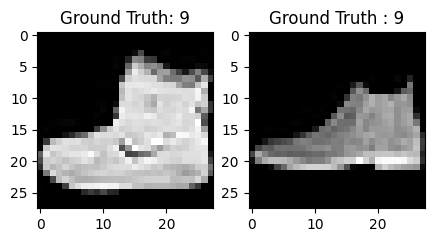

In [4]:
#Taking a look at one of the figures in our dataset.
plt.figure(figsize=[5,5])

#Display the first image in the training set.
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))

#Display the first image in the testing set
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
#As a first step, we need to convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which we will feed into our network.
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
#our data is in an int8 format.  We need to convert it to type float32 and squash the pixel range to the range o to 1 inclusive.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [7]:
#Now we need to convert the class labesl into a one-hot encoding vector.
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

#Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
#Now we need to split our data up into training and testing sets!
from sklearn.model_selection import train_test_split
train_X, valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

_From here, we have finished pre-processing our data._
_Now we have to build the following machine learning model._

# Building the ML Model

INPUT: 28 x 28 x 1 -> Convolution (32 3x3 filter) -> max pooling (2x2) Convolution (64 3x3 Filter) -> Max pooling (2x2) -> Convolution (128 3x3 filter) -> Max Pooling (2x2)
 -> Flatten -> Dense Layer (128 units) -> Output layer (10 Units)

In [14]:
#importing all the modules that we need
import keras
from keras import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU


In [15]:
#setting some hyperparameters
batch_size = 64
epochs = 20
num_classes = 10

In [20]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

# compile the model using the adam optimizer
_other optimizers exist._\
_specify the loss type as categorical cross entropy (often used for multi-class classifiers)_\
_we can also use binary cross-entropy as the loss function_\
_specify the metric we care about during training, which is accuracy_


In [21]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [22]:
#show a visualization of our model.
fashion_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model!

In [23]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/20
  7/750 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.1569 - loss: 2.2659

2024-09-03 13:12:14.754496: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_2_1/leaky_re_lu_4_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_2_1/conv2d_4_1/add'.


750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7479 - loss: 0.6815 - val_accuracy: 0.8904 - val_loss: 0.3108
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8920 - loss: 0.2939 - val_accuracy: 0.8963 - val_loss: 0.2784
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9084 - loss: 0.2455 - val_accuracy: 0.9061 - val_loss: 0.2554
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9210 - loss: 0.2093 - val_accuracy: 0.9112 - val_loss: 0.2385
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9325 - loss: 0.1836 - val_accuracy: 0.9138 - val_loss: 0.2362
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9401 - loss: 0.1636 - val_accuracy: 0.9193 - val_loss: 0.2294
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9479 - loss: 0.1408 - val_accuracy: 0.9162 - val_loss: 0.2371
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9557 - loss: 0.1190 - val_accurac

A high accuracy, low loss, low(ish) validation set accuracy, and a high(ish) validation set loss implies that we're overfitting our data!
We can check that by testing it on our testing set!
# Model Evaluation on the Test Set

In [26]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [29]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  0.4727771580219269
Test accuracy:  0.9115999937057495


In [30]:
print(fashion_train.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Plotting accuracy and loss between training and validation sets

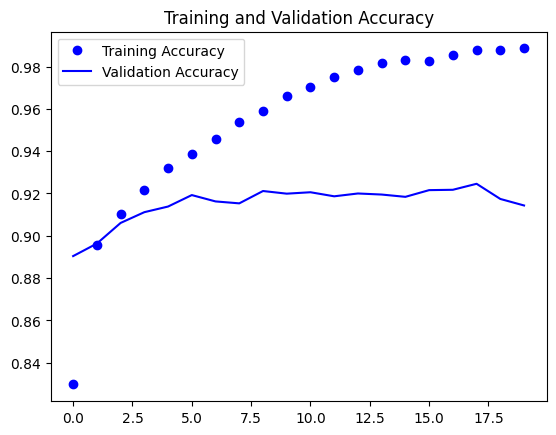

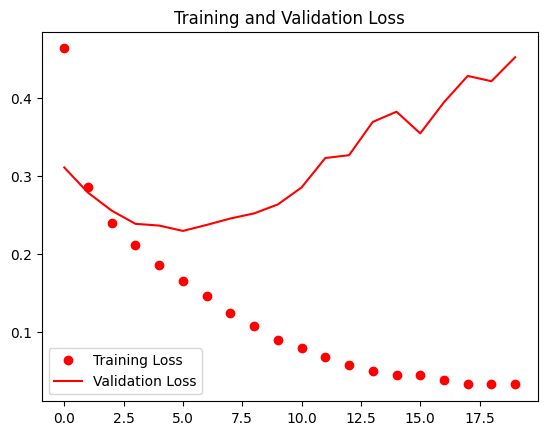

In [33]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

We can see from the above that our model stops improving around the 4th epoch in the validation set.  This implies heavily that we are seeing some overfitting.\
We can try using dropout to help the overfitting problem.

# Adding Dropout Layers to our Network


In [35]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

#summarize the new model
fashion_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#reset epochs back to previous value
epochs = 20

#compile the new network same as before
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

#train the network!
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/20
 10/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2238 - loss: 2.1995  

2024-09-03 14:09:31.604221: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_4_1/leaky_re_lu_13_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_4_1/conv2d_11_1/add'.


750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7159 - loss: 0.7650 - val_accuracy: 0.8753 - val_loss: 0.3468
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8691 - loss: 0.3544 - val_accuracy: 0.8911 - val_loss: 0.2996
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8848 - loss: 0.3040 - val_accuracy: 0.8965 - val_loss: 0.2757
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8986 - loss: 0.2750 - val_accuracy: 0.8993 - val_loss: 0.2677
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9061 - loss: 0.2527 - val_accuracy: 0.9133 - val_loss: 0.2394
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9093 - loss: 0.2394 - val_accuracy: 0.9124 - val_loss: 0.2461
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9164 - loss: 0.2179 - val_accuracy: 0.9185 - val_loss: 0.2280
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9209 - loss: 0.2104 - val_accurac

In [42]:
#save the model for future use!
fashion_model.save("fashion_model_dropout.keras")

In [43]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9189 - loss: 0.2487


In [44]:
print("Test loss: ", test_eval[0])
print("Test accuracy: ", test_eval[1])

Test loss:  0.23972459137439728
Test accuracy:  0.9232000112533569


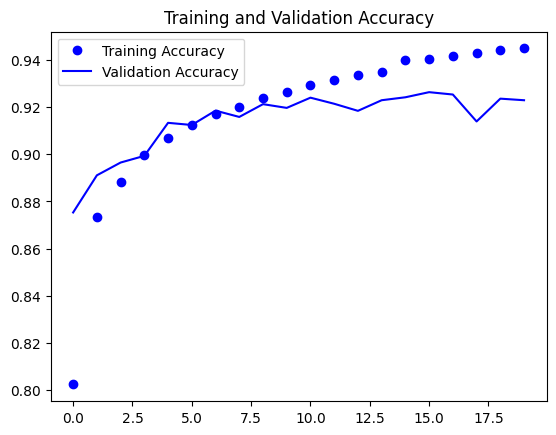

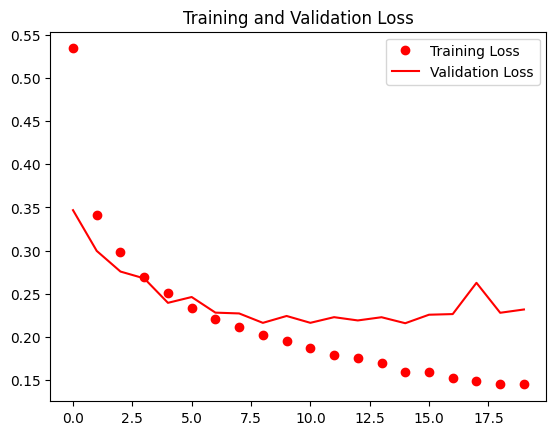

In [45]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predicting Classes

In [49]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)
predicted_classes.shape, test_Y.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


((10000,), (10000,))

In [62]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))

Found 9192 correct labels


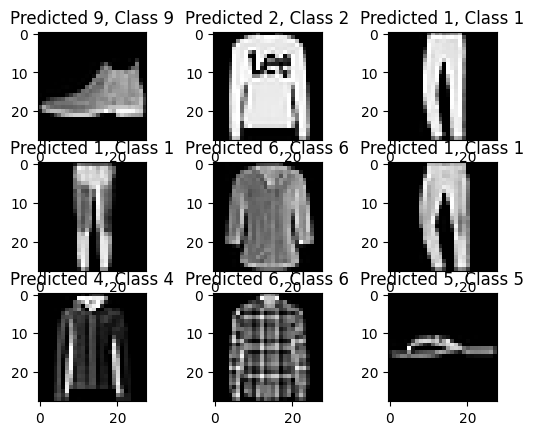

In [63]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))

Found 808 incorrect labels


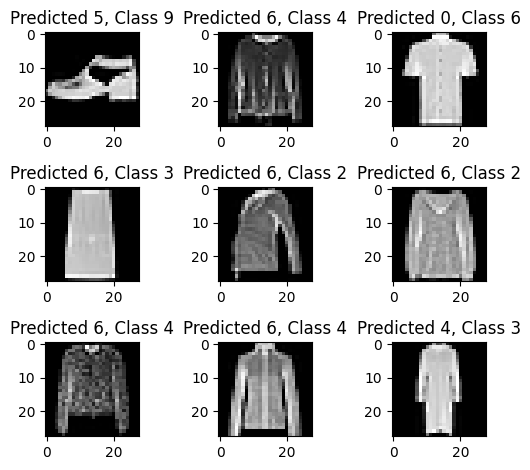

In [60]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()
    

# Classification Report!

In [67]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.89      0.85      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.92      0.85      0.88      1000
     Class 3       0.94      0.91      0.93      1000
     Class 4       0.89      0.85      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.75      0.79      0.77      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Let's Draw the Confusion Matrix!

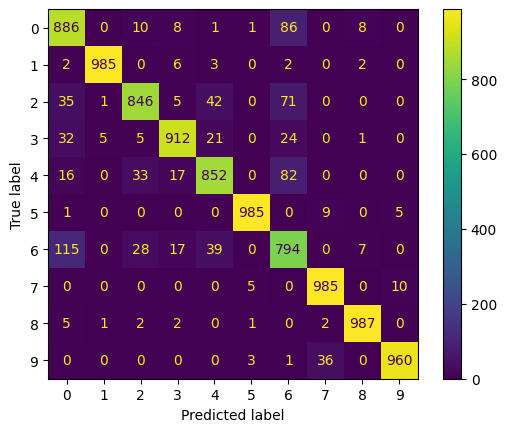

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_true=test_Y, y_pred=predicted_classes))
disp.plot()